# Introducción al TP General

En este TP de Introducción, tiene el proposito de explorar y analizar la base de datos: Defunciones Fetales (2017-2022) extraida de la página de Datos Abiertos PBA en su sección de Salud.

Link: https://catalogo.datos.gba.gob.ar/dataset/defunciones-fetales

Autoras:

* *Poidomani Mabel*
* *Tebes Stella Maris*
* *Valenzuela Sonia Daniela*
* *Villalba Camila*

# Primero cargamos los paquetes y los datos

Instalación de Paquetes, luego los importamos.

In [1]:
#Comentados para que no se ejecuten

# !pip install pandas
# !pip install matplotlib
!pip install seaborn
!pip install numpy
!pip install pandas==1.5.3     # Una versión específica de Pandas
!pip install ydata-profiling   # Para generar un reporte completo

  Using cached pandas-1.5.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached pandas-1.5.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.0 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.3.0
    Uninstalling pandas-2.3.0:
      Successfully uninstalled pandas-2.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
visions 0.8.1 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.5 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
xarray 2025.3.1 requires pandas>=2.1, but you have pandas 1.5.3 which is incompatible.
cudf-cu12 25.2.1 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.5 requir

In [2]:
# =============================================
# CONFIGURACIÓN INICIAL PARA GOOGLE COLAB
# =============================================

# Magic command de Jupyter/IPython: Para mostrar gráficos inline directamente en el notebook
%matplotlib inline

# =============================================
# IMPORTACIÓN DE LIBRERÍAS BÁSICAS
# =============================================

import os  # Módulo OS: Para interactuar con el sistema operativo (manejo de archivos/directorios)
import numpy as np  # Para operaciones numéricas y álgebra lineal
import pandas as pd  # Para manejo y análisis de datos en DataFrames

# =============================================
# IMPORTACIÓN DE LIBRERÍAS DE VISUALIZACIÓN
# =============================================

import matplotlib.pyplot as plt  # Para creación de gráficos básicos
import seaborn as sns  # Para visualizaciones estadísticas avanzadas - Se integra con Matplotlib para mejorar los gráficos.

# =============================================
# CONFIGURACIÓN DE ESTILOS Y PARÁMETROS
# =============================================

# Configuración específica de Seaborn:
# - "whitegrid": fondo con cuadrícula
# - color_codes: permite usar códigos de color simples ('b', 'g', 'r', etc.)
sns.set(style="whitegrid", color_codes=True)

Montamos el Drive:

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Aquí cargaremos la base de datos de "Defunciones Fetales (2017 - 2022)" para hacer una primera visualización de cómo se ven los datos originales del DataFrame, previo a realizar cualquier cambio que se considere conveniente para su posterior analisis.

Código para visualización inicial (antes de hacer cualquier modificación):

In [5]:
# PASO 1 - CARGA ORIGINAL (sin modificaciones)
print("=== DATOS ORIGINALES ===")
df_original = pd.read_csv("/content/drive/MyDrive/MD-TP General/defunciones-fetales-2017_2022.csv")

# 1. Mostrar estructura básica
print("\n🔍 Estructura Inicial:")
print(f"• Filas: {len(df_original)}")
print(f"• Nombres reales de las Columnas: {df_original.columns.tolist()}")
print(f"• Tipo de datos:\n{df_original.dtypes}")
print()

# 2. Mostrar muestra de datos (configuración temporal)
with pd.option_context('display.max_rows', 10, 'display.max_columns', None):
    print("\n📋 Vista previa (10 primeras filas):")
    display(df_original.head(10))

# 3. Guardar metadatos para comparación posterior
forma_original = df_original.shape
columnas_originales = df_original.columns.tolist()
muestra_indice_original = df_original.iloc[:3].to_dict('records')



=== DATOS ORIGINALES ===

🔍 Estructura Inicial:
• Filas: 741
• Nombres reales de las Columnas: ['anio', 'residencia_muncipio_id\xa0', 'residencia_muncipio_nombre', 'cantidad\xa0']
• Tipo de datos:
anio                           int64
residencia_muncipio_id         int64
residencia_muncipio_nombre    object
cantidad                       int64
dtype: object


📋 Vista previa (10 primeras filas):


,anio,residencia_muncipio_id,residencia_muncipio_nombre,cantidad
0,2017,6007,Adolfo Alsina,1
1,2017,6014,Adolfo Gonzales Chaves,1
2,2017,6021,Alberti,1
3,2017,6028,Almirante Brown,61
4,2017,6035,Avellaneda,40
5,2017,6042,Ayacucho,4
6,2017,6049,Azul,2
7,2017,6056,Bahía Blanca,18
8,2017,6063,Balcarce,4
9,2017,6070,Baradero,2


Una vez que observamos los datos que tenemos en el DataFrame, queremos hacer unas modificaciones en la carga de los datos para optimizar la visualización de los mismos.

Se procederá a cambiar los nombres de las columnas para simplificarlas y lograr una mejor comprensión; además se establecerá la variable año como índice del tipo period[Y-DEC], para posteriores analisis temporales.

In [6]:
# Cargar el CSV y renombrar las columnas:
df = pd.read_csv(
    '/content/drive/MyDrive/MD-TP General/defunciones-fetales-2017_2022.csv',
    dtype={'anio': str} # Leer 'anio' como texto para evitar problemas
).rename(columns={
    'anio': 'Año',
    'residencia_muncipio_id\xa0': 'ID Municipio',
    'residencia_muncipio_nombre': 'Municipio',
    'cantidad\xa0': 'Cantidad Defunciones'
})

# Convertir a índice de PERIODO ANUAL (solo año, sin mes/día ficticios)
df['Año'] = pd.to_datetime(df['Año'], format='%Y').dt.to_period('Y')  # 2017, 2018, ...
df = df.set_index('Año')

# VERIFICACIONES:

# Mostrar el DataFrame (índice solo con año):
print("\nDataFrame con índice de AÑO PURO (Periodo):")
display(df.head(5))

# Mostrar el tipo de índice:
print("\nTipo del índice:", df.index.dtype)  # period[Y-DEC] (año puro)

# Verificación rápida para confirmar que el índice (ahora compuesto por años) reconoce correctamente
#los valores como rangos temporales, a pesar de no usar datetime:
print("\n¿Puedo filtrar por rango?", '2018' in df.index)  # Tiene que decir True ✅

# Inspeccionar los nombres modificados de las columnas:
print("Nombres de Columnas:", df.columns.tolist())



DataFrame con índice de AÑO PURO (Periodo):


,ID Municipio,Municipio,Cantidad Defunciones
Año,,,
2017,6007,Adolfo Alsina,1
2017,6014,Adolfo Gonzales Chaves,1
2017,6021,Alberti,1
2017,6028,Almirante Brown,61
2017,6035,Avellaneda,40



Tipo del índice: period[Y-DEC]

¿Puedo filtrar por rango? True
Nombres de Columnas: ['ID Municipio', 'Municipio', 'Cantidad Defunciones']


# Observaremos a continuación qué datos tenemos.

In [7]:
df

,ID Municipio,Municipio,Cantidad Defunciones
Año,,,
2017,6007,Adolfo Alsina,1
2017,6014,Adolfo Gonzales Chaves,1
2017,6021,Alberti,1
2017,6028,Almirante Brown,61
2017,6035,Avellaneda,40
...,...,...,...
2022,6861,Vicente López,6
2022,6868,Villa Gesell,1
2022,6875,Villarino,5


Verificamos el número de filas y columnas del DataFrame:

In [8]:
print(df.shape)

(741, 3)


Verificamos los últimos registros:

In [9]:
df.tail(10)

,ID Municipio,Municipio,Cantidad Defunciones
Año,,,
2022,6805,Tigre,32
2022,6826,Trenque Lauquen,5
2022,6833,Tres Arroyos,3
2022,6840,Tres de Febrero,15
2022,6854,25 de Mayo,3
2022,6861,Vicente López,6
2022,6868,Villa Gesell,1
2022,6875,Villarino,5
2022,6882,Zárate,5


Obtener información sobre las columnas del DataFrame:

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 741 entries, 2017 to 2022
Freq: Y-DEC
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID Municipio          741 non-null    int64 
 1   Municipio             741 non-null    object
 2   Cantidad Defunciones  741 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 39.3+ KB
None


Estadísticas descriptivas de la columna numérica "Cantidad Defunciones":

In [11]:
print(df['Cantidad Defunciones'].describe())

count    741.00000
mean      11.82726
std       27.12583
min        0.00000
25%        1.00000
50%        2.00000
75%        9.00000
max      361.00000
Name: Cantidad Defunciones, dtype: float64


# Limpieza de Datos

El proceso de limpieza de datos del DataFrame, tanto en este Google Colab como en cualquier entorno de análisis de datos que se realice, resulta fundamental ya que nos permite preparar los datos y asegurar que sean consistentes, completos y correctos antes de realizar análisis, modelado o visualizaciones.

Procedemos a verificar si hay "Valores Nulos o Faltantes" en el DataFrame; como ser: Celdas vacías (NaN, None) o marcadores incorrectos (Ej: "N/A", "Desconocido").

In [12]:
df.isnull().sum()

,0
ID Municipio,0
Municipio,0
Cantidad Defunciones,0


Ya que en nuestro DataFrame no tenemos valores faltantes o nulos; ahora verificaremos si hay "Datos duplicados", es decir, filas idénticas repetidas.

In [13]:
df.duplicated().sum()

np.int64(228)

Aparentemente tenemos 228 "Datos Duplicados", tenemos que explorar bien si realmente son datos redundantes o es un error.

Para ello procederemos a hacer otros analisis de duplicados más exhaustivos.

In [14]:
# ANÁLISIS DE DUPLICADOS
with pd.option_context('display.max_rows', None):  # Configuración temporal

    # 1. Definir columnas clave
    columnas_clave = ['ID Municipio', 'Municipio', 'Cantidad Defunciones']

    # 2. Verificar columnas
    if not all(col in df.columns for col in columnas_clave):
        print("Error: Algunas columnas no existen")
        print("Columnas disponibles:", df.columns.tolist())
    else:
        # 3. Encontrar duplicados
        duplicados = df[df.duplicated(subset=columnas_clave, keep=False)]

        # 4. Mostrar resultados
        print(f"\n🔍 Registros duplicados (basados en {columnas_clave}): {len(duplicados)}")
        print(f"(Coincide con {df.duplicated(subset=columnas_clave).sum()} duplicados reportados)")

        if len(duplicados) > 0:
            print("\nEjemplos:")
            display(duplicados.sort_values(by=columnas_clave).head(10))


🔍 Registros duplicados (basados en ['ID Municipio', 'Municipio', 'Cantidad Defunciones']): 390
(Coincide con 228 duplicados reportados)

Ejemplos:


,ID Municipio,Municipio,Cantidad Defunciones
Año,,,
2019,6007,Adolfo Alsina,0
2020,6007,Adolfo Alsina,0
2017,6007,Adolfo Alsina,1
2018,6007,Adolfo Alsina,1
2017,6014,Adolfo Gonzales Chaves,1
2018,6014,Adolfo Gonzales Chaves,1
2019,6014,Adolfo Gonzales Chaves,1
2020,6014,Adolfo Gonzales Chaves,1
2018,6021,Alberti,0


In [15]:
def analisis_duplicados_seguro(df_original):
    """Función encapsulada que no modifica el DataFrame original"""
    # Crear copia local para trabajar
    df = df_original.copy()

    # 1. Verificar estructura básica
    print("📊 Estructura del DataFrame:")
    print(f"Total de registros: {len(df)}")
    print(f"Columnas disponibles: {df.columns.tolist()}\n")

    # 2. Añadir columna temporal de año
    df['Año_temp'] = df.index.year

    # 3. Análisis de valores únicos
    print("🔍 Análisis de valores únicos:")
    print(f"Años registrados: {df['Año_temp'].nunique()} años → {sorted(df['Año_temp'].unique())}")
    print(f"Total municipios: {df['Municipio'].nunique()}")
    print(f"Total IDs Municipio: {df['ID Municipio'].nunique()}\n")

    # 4. Verificar consistencia entre ID Municipio y Nombre
    if df.groupby('ID Municipio')['Municipio'].nunique().max() == 1:
        print("✅ Consistencia: Cada ID Municipio tiene un único nombre")
    else:
        print("⚠️ Inconsistencias: Hay IDs Municipio con diferentes nombres")

    # 5. Buscar duplicados (usando columna temporal)
    print("\n🔎 Búsqueda de duplicados reales (mismo año y mismo municipio):")
    duplicados = df[df.duplicated(subset=['Año_temp', 'Municipio'], keep=False)]

    # Mostrar resultados con configuración temporal
    with pd.option_context('display.max_rows', 10):
        if not duplicados.empty:
            print(f"Se encontraron {len(duplicados)} registros duplicados")
            print("\nEjemplos de duplicados (primeros 5):")
            display(duplicados[['ID Municipio', 'Municipio', 'Cantidad Defunciones', 'Año_temp']]
                   .sort_values(['Año_temp', 'Municipio']).head())

            # Verificar inconsistencias
            grupos = duplicados.groupby(['Año_temp', 'Municipio'])['Cantidad Defunciones']
            if grupos.nunique().max() > 1:
                print("\n⚠️ Algunos duplicados tienen cantidades diferentes")
                display(grupos.apply(list).loc[grupos.nunique() > 1])
        else:
            print("✅ No hay duplicados reales")

    # 6. Análisis de Cantidad Defunciones (sin modificar)
    print("\n📈 Estadísticas de 'Cantidad Defunciones':")
    with pd.option_context('display.max_rows', 8):
        display(df_original['Cantidad Defunciones'].describe().to_frame())

# Ejecutar análisis seguro
analisis_duplicados_seguro(df)

📊 Estructura del DataFrame:
Total de registros: 741
Columnas disponibles: ['ID Municipio', 'Municipio', 'Cantidad Defunciones']

🔍 Análisis de valores únicos:
Años registrados: 6 años → [np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022)]
Total municipios: 136
Total IDs Municipio: 136

✅ Consistencia: Cada ID Municipio tiene un único nombre

🔎 Búsqueda de duplicados reales (mismo año y mismo municipio):
✅ No hay duplicados reales

📈 Estadísticas de 'Cantidad Defunciones':


,Cantidad Defunciones
count,741.00000
mean,11.82726
std,27.12583
min,0.00000
25%,1.00000
50%,2.00000
75%,9.00000
max,361.00000


Por lo visto no hay valores duplicados reales. Lo que pudo pasar es que se repetian lo datos en la variable "Cantidad Defunciones" pero era en distintos "Municipios"; asi también se repiten los "Municipios" pero es en distintos "Años"; por lo cual los datos duplicados que se veían al principio no son relevantes para tomarlos en cuenta o para ser eliminados.

Ahora vamos a verificar si hay "Inconsistencias en categorías/texto", es decir: Errores de formato, mayúsculas o palabras similares con variaciones.

Ejemplo: "Adolfo Alsina" vs "adolfo alsina" (mismo municipio, diferente formato).

In [16]:
print(df['Municipio'].unique())

['Adolfo Alsina' 'Adolfo Gonzales Chaves' 'Alberti' 'Almirante Brown'
 'Avellaneda' 'Ayacucho' 'Azul' 'Bahía Blanca' 'Balcarce' 'Baradero'
 'Arrecifes' 'Benito Juárez' 'Berazategui' 'Berisso' 'Bolívar' 'Bragado'
 'Brandsen' 'Campana' 'Cañuelas' 'Capitán Sarmiento' 'Carlos Casares'
 'Carlos Tejedor' 'Carmen de Areco' 'Castelli' 'Colón'
 'Coronel de Marina Leonardo Rosales' 'Coronel Dorrego' 'Coronel Pringles'
 'Coronel Suárez' 'Chacabuco' 'Chascomús' 'Chivilcoy' 'Daireaux' 'Dolores'
 'Ensenada' 'Escobar' 'Esteban Echeverría' 'Exaltación de la Cruz'
 'Ezeiza' 'Florencio Varela' 'Florentino Ameghino' 'General Alvarado'
 'General Alvear' 'General Arenales' 'General Belgrano' 'General Guido'
 'General Juan Madariaga' 'General La Madrid' 'General Las Heras'
 'General Lavalle' 'General Paz' 'General Pinto' 'General Pueyrredón'
 'General Rodríguez' 'General San Martín' 'General Viamonte'
 'General Villegas' 'Guaminí' 'Hipólito Yrigoyen' 'Hurlingham' 'Ituzaingó'
 'José C. Paz' 'Junín' 'La Costa

In [17]:
# ANÁLISIS DE INCONSISTENCIAS EN MUNICIPIOS (SOLO LECTURA)
# --------------------------------------------------------

# 1. Crear una COPIA del DataFrame para análisis
df_analisis = df.copy()

# 2. Análisis de valores únicos (sin modificar datos originales)
print("🔍 Análisis SIN MODIFICAR los datos originales:")
valores_unicos = df_analisis['Municipio'].unique()
print(f"\nValores únicos en 'Municipio': {len(valores_unicos)}")
print("Ejemplos:", valores_unicos[:5])  # Muestra solo 5 valores

# 3. Detección de problemas (solo visual)
problemas = {
    'Espacios extras': any("  " in x or x.startswith(" ") or x.endswith(" ") for x in valores_unicos),
    'Mayúsculas inconsistentes': len(set(x.lower() for x in valores_unicos)) < len(valores_unicos),
    'Nombres repetidos difieren': len(set(x.strip().title() for x in valores_unicos)) < len(valores_unicos)
}

print("\n🚨 Problemas detectados (solo para diagnóstico):")
for tipo, existe in problemas.items():
    print(f"• {tipo}: {'✅ Sí' if existe else '❌ No'}")

# 4. Ejemplos de problemas (sin alterar datos)
if problemas['Mayúsculas inconsistentes']:
    print("\n📌 Ejemplo de mayúsculas inconsistentes:")
    ejemplo = next(x for x in valores_unicos if any(x.lower() == y.lower() and x != y for y in valores_unicos))
    print(f"Ejemplo encontrado: '{ejemplo}' vs '{next(y for y in valores_unicos if y.lower() == ejemplo.lower() and y != ejemplo)}'")

# 5. Estadísticas (sin cambios reales)
print("\n📊 Datos originales preservados:")
print(f"• Total municipios original: {len(valores_unicos)}")
print(f"• Total si se normalizaran: {len(set(x.strip().title() for x in valores_unicos))}")
print("\n💡 Nota: Este análisis NO modificó el DataFrame original.")

🔍 Análisis SIN MODIFICAR los datos originales:

Valores únicos en 'Municipio': 136
Ejemplos: ['Adolfo Alsina' 'Adolfo Gonzales Chaves' 'Alberti' 'Almirante Brown'
 'Avellaneda']

🚨 Problemas detectados (solo para diagnóstico):
• Espacios extras: ❌ No
• Mayúsculas inconsistentes: ❌ No
• Nombres repetidos difieren: ❌ No

📊 Datos originales preservados:
• Total municipios original: 136
• Total si se normalizaran: 136

💡 Nota: Este análisis NO modificó el DataFrame original.


Este es otro analisis para detectar algún otro tipo de inconsistencia que pueda tener la base de datos.

In [18]:
# ANÁLISIS COMPLETO SIN MODIFICAR EL DATAFRAME
# --------------------------------------------

def analizar_datos(df_original):
    """Función que analiza sin modificar el DataFrame original"""
    print("🔍 INICIO DE ANÁLISIS (sin modificar datos) 🔍")

    # 1. Análisis de tipos de datos
    print("\n1. 📐 TIPOS DE DATOS:")
    print(df_original.dtypes)

    # Sugerencias de tipos (solo visual)
    sugerencias = {
        'ID Municipio': 'int64',
        'Cantidad Defunciones': 'int64'
    }
    print("\n💡 Sugerencias de tipos (basado en nombres de columnas):")
    for col, tipo in sugerencias.items():
        if col in df_original.columns:
            print(f"- {col}: {df_original[col].dtype} → podría ser {tipo}")

    # 2. Rangos o valores inválidos
    print("\n2. 🔢 RANGOS DE VALORES:")
    if 'Año' in df_original.columns:
        print(f"- Año: {df_original['Año'].min()} a {df_original['Año'].max()}")
    if 'Cantidad Defunciones' in df_original.columns:
        print(f"- Cantidad Defunciones: {df_original['Cantidad Defunciones'].min()} a {df_original['Cantidad Defunciones'].max()}")
        if (df_original['Cantidad Defunciones'] < 0).any():
            print("  ⚠️ ¡Valores negativos encontrados!")

    # 3. Inconsistencias temporales
    print("\n3. 📅 INCONSISTENCIAS TEMPORALES:")
    if 'Año' in df_original.columns:
        años_unicos = sorted(df_original['Año'].unique())
        print(f"- Años únicos: {años_unicos}")

        # Verificar años fuera de rango esperado
        año_actual = pd.Timestamp.now().year
        años_raros = [a for a in años_unicos if a > año_actual or a < 2000]  # Ajusta el rango según tu contexto
        if años_raros:
            print(f"  ⚠️ Años sospechosos: {años_raros}")

    print("\n✅ Análisis completado (el DataFrame NO fue modificado)")

# Ejecutar análisis
analizar_datos(df)

🔍 INICIO DE ANÁLISIS (sin modificar datos) 🔍

1. 📐 TIPOS DE DATOS:
ID Municipio             int64
Municipio               object
Cantidad Defunciones     int64
dtype: object

💡 Sugerencias de tipos (basado en nombres de columnas):
- ID Municipio: int64 → podría ser int64
- Cantidad Defunciones: int64 → podría ser int64

2. 🔢 RANGOS DE VALORES:
- Cantidad Defunciones: 0 a 361

3. 📅 INCONSISTENCIAS TEMPORALES:

✅ Análisis completado (el DataFrame NO fue modificado)


Verificamos la existencia de Outliers (valores atípicos).
Qué son: Valores numéricos extremadamente altos/bajos que distorsionan el análisis.

Ejemplo: En "Cantidad Defunciones", un valor de 500 cuando el promedio es 20.

<Axes: xlabel='Cantidad Defunciones'>

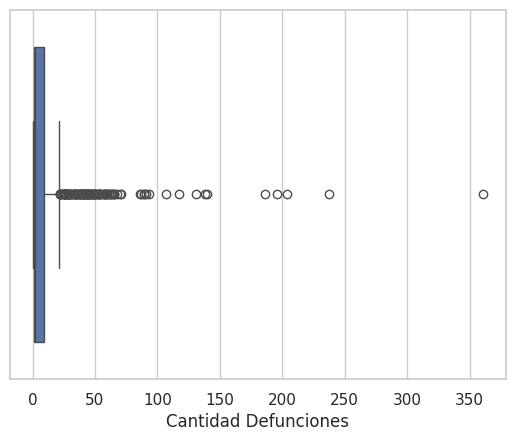

In [19]:
sns.boxplot(data=df, x='Cantidad Defunciones')


📊 ANÁLISIS DE VALORES EXTREMOS PARA 'Cantidad Defunciones':
Estadísticas descriptivas:
count    741.00000
mean      11.82726
std       27.12583
min        0.00000
25%        1.00000
50%        2.00000
75%        9.00000
max      361.00000
Name: Cantidad Defunciones, dtype: float64

🔍 Valores extremos (superiores a 21.00):
- Cantidad de outliers: 120
- Ejemplos:


,ID Municipio,Municipio,Cantidad Defunciones
Año,,,
2017,6028,Almirante Brown,61
2017,6035,Avellaneda,40
2017,6091,Berazategui,38


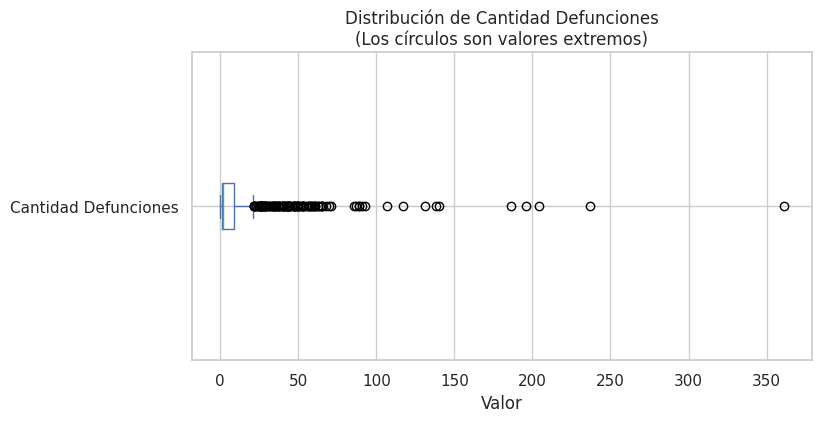


💡 Recomendaciones:
- Valores extremos pueden ser casos especiales que merecen investigación
- Considerar si los outliers son errores o datos válidos


In [20]:
# ANÁLISIS DE VALORES EXTREMOS (NO MODIFICA DATOS)
# ------------------------------------------------

import matplotlib.pyplot as plt

def analizar_valores_extremos(df_original, columna='Cantidad Defunciones'):
    """Genera análisis visual sin modificar los datos"""
    if columna not in df_original.columns:
        print(f"⚠️ La columna '{columna}' no existe")
        return

    print(f"\n📊 ANÁLISIS DE VALORES EXTREMOS PARA '{columna}':")

    # 1. Estadísticas básicas
    stats = df_original[columna].describe()
    print("Estadísticas descriptivas:")
    print(stats)

    # 2. Detección de outliers (solo cálculo)
    Q1 = stats['25%']
    Q3 = stats['75%']
    IQR = Q3 - Q1
    umbral_superior = Q3 + 1.5*IQR
    outliers = df_original[df_original[columna] > umbral_superior]

    print(f"\n🔍 Valores extremos (superiores a {umbral_superior:.2f}):")
    print(f"- Cantidad de outliers: {len(outliers)}")
    print("- Ejemplos:")
    display(outliers.head(3))

    # 3. Boxplot (visualización segura)
    plt.figure(figsize=(8, 4))
    df_original[columna].plot(kind='box', vert=False)
    plt.title(f'Distribución de {columna}\n(Los círculos son valores extremos)')
    plt.xlabel('Valor')
    plt.grid(True)
    plt.show()

    # 4. Sugerencias (solo visual)
    print("\n💡 Recomendaciones:")
    print("- Valores extremos pueden ser casos especiales que merecen investigación")
    print("- Considerar si los outliers son errores o datos válidos")

# Ejecutar análisis (no modifica df)
analizar_valores_extremos(df)

In [21]:
df

,ID Municipio,Municipio,Cantidad Defunciones
Año,,,
2017,6007,Adolfo Alsina,1
2017,6014,Adolfo Gonzales Chaves,1
2017,6021,Alberti,1
2017,6028,Almirante Brown,61
2017,6035,Avellaneda,40
...,...,...,...
2022,6861,Vicente López,6
2022,6868,Villa Gesell,1
2022,6875,Villarino,5


# Analisis de Estadística Descriptiva con Gráficos incluidos

Estadísticas Descriptivas de la variable "Cantidad Defunciones":

In [22]:
print(df['Cantidad Defunciones'].describe())

count    741.00000
mean      11.82726
std       27.12583
min        0.00000
25%        1.00000
50%        2.00000
75%        9.00000
max      361.00000
Name: Cantidad Defunciones, dtype: float64


Los datos revelan una distribución altamente asimétrica con una marcada desigualdad en lo que respecta a las defunciones fetales entre municipios. La media (11.83) es significativamente mayor que la mediana (2), indicando que la mayoría de las localidades registran pocos eventos (50% con ≤2 anuales), mientras que unos pocos municipios presentan cifras excepcionalmente altas, distorsionando el promedio. Esto se confirma con la alta desviación estándar (27.13), que refleja una amplia dispersión en los datos.

El análisis por cuartiles muestra que el 25% de los municipios registró 1 o menos defunciones anuales, el 75% de los municipios acumula ≤9 casos anuales, pero el valor máximo (361) en un solo municipio/ año destaca como un outlier extremo, posiblemente asociado a factores como densidad poblacional, desigualdades en salud, como ser problemas específicos de salud pública en determinadas regiones o así también problemas de registro.


Inferencias clave:

* La mayoría de los municipios tienen baja incidencia, pero unos pocos concentran cifras alarmantes.
* Los outliers reflejan realidades estructurales (ej. acceso limitado a salud) o eventos puntuales.
* Se requiere normalizar los datos (ej. defunciones por cada 1,000 nacimientos) para identificar riesgos reales.

Tras los promedios obtenidos se puede concluir que, existen disparidades que demandan intervenciones focalizadas en grupos vulnerables.



In [23]:
# 1. FILTRAR REGISTROS IGNORADOS (2 métodos equivalentes)
ignorados = df[df['Municipio'] == 'Ignorado']  # Opción 1: por nombre
ignorados = df[df['ID Municipio'] == 6999]      # Opción 2: por ID (más seguro)

# 2. CALCULAR TOTALES
total_ignorados = ignorados['Cantidad Defunciones'].sum()
total_general = df['Cantidad Defunciones'].sum()

# 3. PORCENTAJE (con redondeo a 1 decimal)
porcentaje_ignorados = round((total_ignorados / total_general) * 100, 1)

print(f"Defunciones ignoradas: {total_ignorados} de {total_general} ({porcentaje_ignorados}%)")

Defunciones ignoradas: 937 de 8764 (10.7%)


Podemos observar que un 10.7 % del total de las defunciones fetales registradas, no registran el nombre auténtico de la localidad o municipio, están registrados bajo el nombre de Ignorado, con el ID Municipio 6999.

La cantidad exacta consta de 937 defunciones en una base de datos que contempla un total de 8764 defunciones fetales.

De esto inferimos que no se trataria de un único Municipio en particular, sino que podrían llegar a ser distintos Municipios ubicados tal vez en zonas de difícil acceso para hacer el relevamiento de datos completamente específicado por zona geográfica.


Aparte de "Ignorado", el municipio de la Matanza es el que registra un mayor porcentaje de defunciones fetales, un 10.1% (884 eventos). Observemos un poco su evolución anual y la comparación con otros municipios.

Hay un claro descenso en la cantidad de defunciones a lo largo de los años 2017-2022, que puede deberse a diferentes factores como ser: Mejoras en atención prenatal, Políticas públicas focalizadas, Disminución de embarazos de alto riesgo, entre otros.


ANÁLISIS DE DEFUNCIONES FETALES - LA MATANZA (2017-2022)

Defunciones totales en La Matanza: 884
Defunciones totales en Provincia: 8,764
Porcentaje que representa: 10.1%

ID del municipio: 6427


EVOLUCIÓN ANUAL:
Año
2017    196
2018    186
2019    131
2020    138
2021    140
2022     93

COMPARACIÓN CON OTROS MUNICIPIOS:
Municipio
Ignorado            937
La Matanza          884
Lomas de Zamora     527
Quilmes             393
Florencio Varela    360


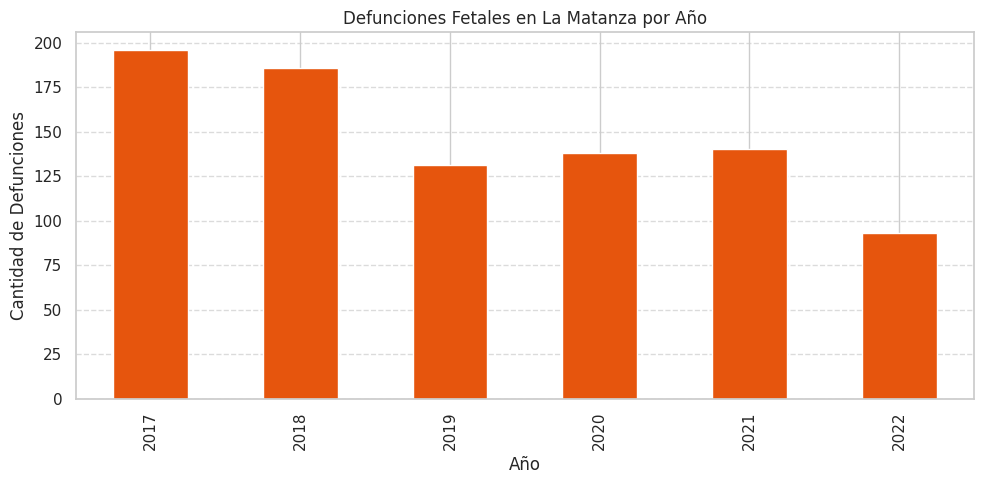

In [24]:
# =============================================
# ANÁLISIS DE DEFUNCIONES FETALES EN LA MATANZA
# =============================================

# Filtrar registros de La Matanza (2 métodos equivalentes)
# --------------------------------------------------------

# Método 1: Por nombre exacto del municipio
la_matanza_nombre = df[df['Municipio'] == 'La Matanza']

# Método 2: Por ID de municipio (más robusto para evitar errores de escritura)
# Primero identificamos el ID correspondiente a La Matanza
id_matanza = df.loc[df['Municipio'] == 'La Matanza', 'ID Municipio'].unique()[0]
la_matanza_id = df[df['ID Municipio'] == id_matanza]

# Verificación de coincidencia entre ambos métodos
assert la_matanza_nombre.shape[0] == la_matanza_id.shape[0], "Los métodos de filtrado no coinciden"

# Usamos el dataframe filtrado por ID (más seguro)
la_matanza = la_matanza_id.copy()

# Cálculo de estadísticas
# -----------------------

# 1. Total de defunciones en La Matanza
total_matanza = la_matanza['Cantidad Defunciones'].sum()

# 2. Total general de defunciones
total_general = df['Cantidad Defunciones'].sum()

# 3. Porcentaje que representa La Matanza (redondeado a 1 decimal)
porcentaje_matanza = round((total_matanza / total_general) * 100, 1)

# Resultados principales
# ---------------------

print(f"""
ANÁLISIS DE DEFUNCIONES FETALES - LA MATANZA (2017-2022)
=======================================================

Defunciones totales en La Matanza: {total_matanza:,}
Defunciones totales en Provincia: {total_general:,}
Porcentaje que representa: {porcentaje_matanza}%

ID del municipio: {id_matanza}
""")

# Evolución anual detallada
# -------------------------

print("\nEVOLUCIÓN ANUAL:")
evolucion_anual = la_matanza.groupby(la_matanza.index.year)['Cantidad Defunciones'].sum()
print(evolucion_anual.to_string())

# Comparación con otros municipios
# -------------------------------

print("\nCOMPARACIÓN CON OTROS MUNICIPIOS:")
top_municipios = df.groupby('Municipio')['Cantidad Defunciones'].sum().nlargest(5)
print(top_municipios.to_string())

# Visualización rápida (opcional)
# ------------------------------

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
evolucion_anual.plot(kind='bar', color='#e6550d')
plt.title('Defunciones Fetales en La Matanza por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Defunciones')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

A continuación realizaremos un análisis completo del DataFrame de Defunciones Fetales; con la intención de detectar cuáles son los municipios que registran una mayor cantidad de eventos.

TOP 10 MUNICIPIOS CON MAYOR CANTIDAD DE DEFUNCIONES FETALES (2017-2022)
Total de defunciones en Provincia Buenos Aires: 8,764

       Municipio  ID Municipio  Cantidad Defunciones  Porcentaje  Porcentaje Acumulado
        Ignorado          6999                   937       10.69                 10.69
      La Matanza          6427                   884       10.09                 20.78
 Lomas de Zamora          6490                   527        6.01                 26.79
         Quilmes          6658                   393        4.48                 31.27
Florencio Varela          6274                   360        4.11                 35.38
        La Plata          6441                   356        4.06                 39.44
 Almirante Brown          6028                   330        3.77                 43.21
          Moreno          6560                   296        3.38                 46.59
           Merlo          6539                   291        3.32                 49.91
   

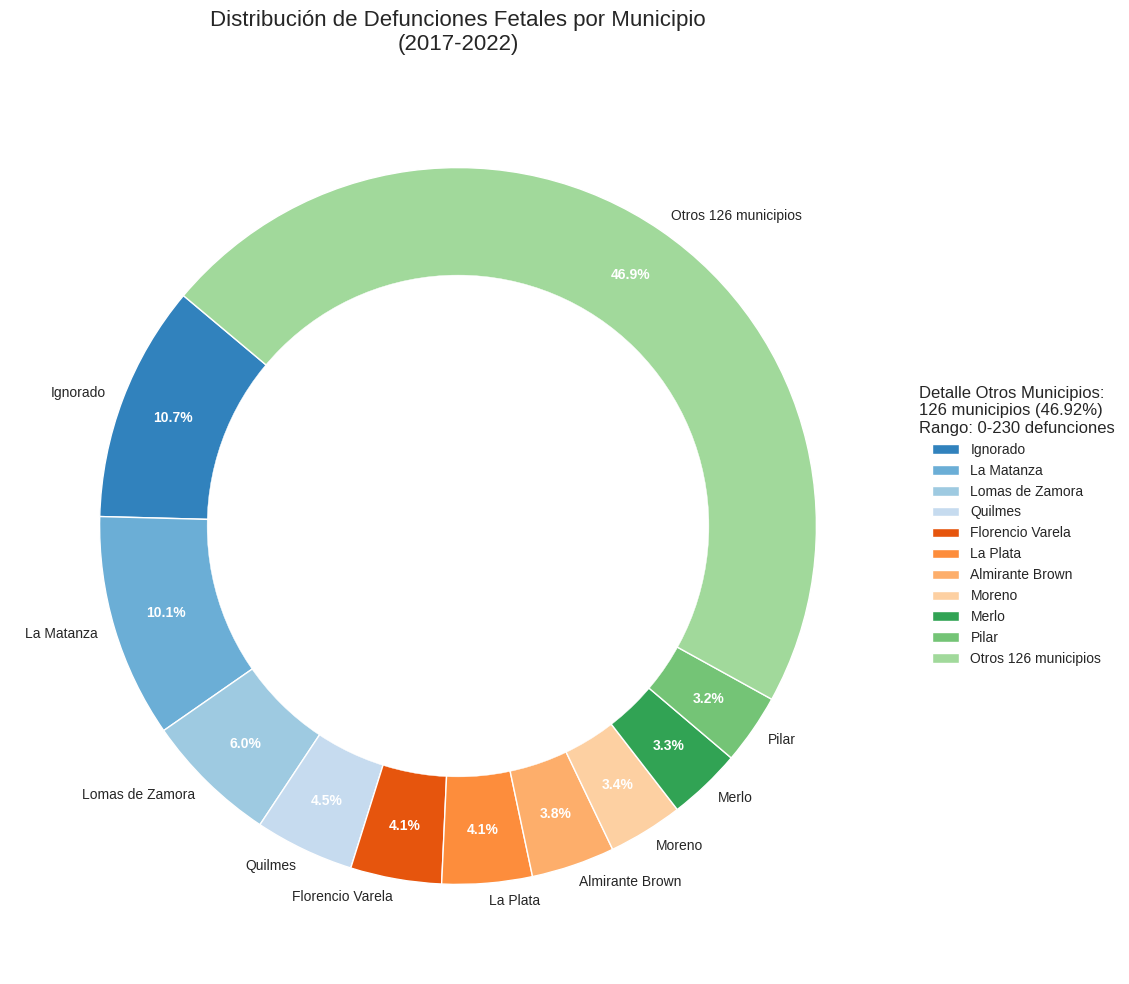

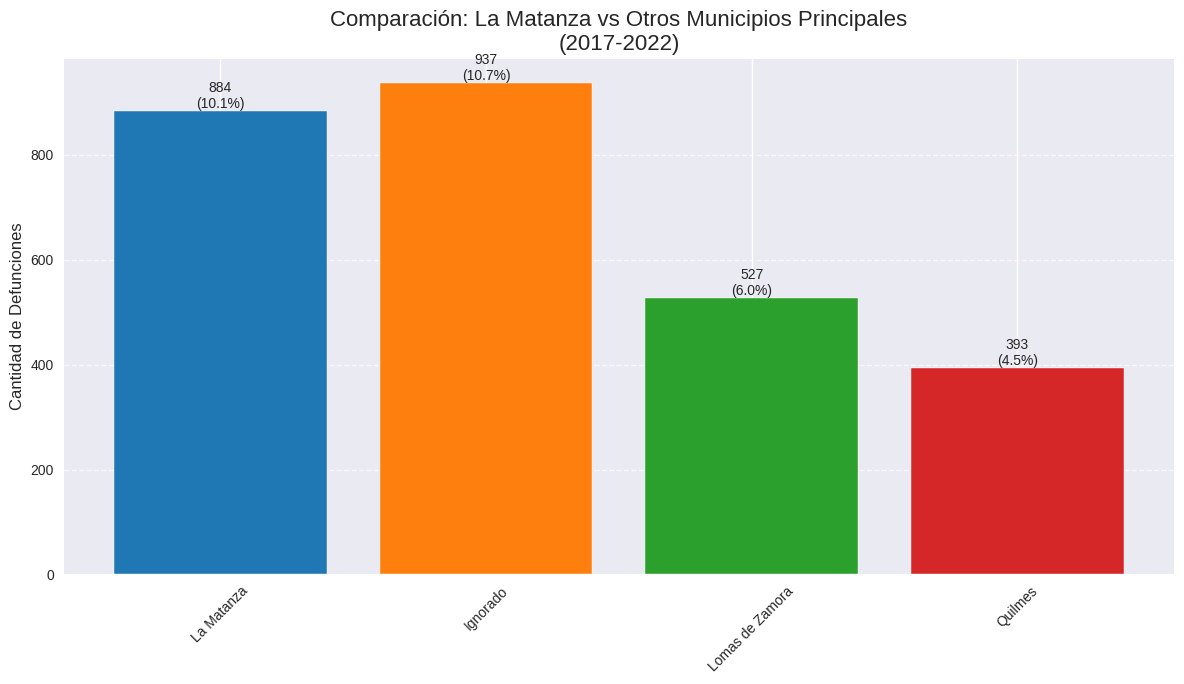

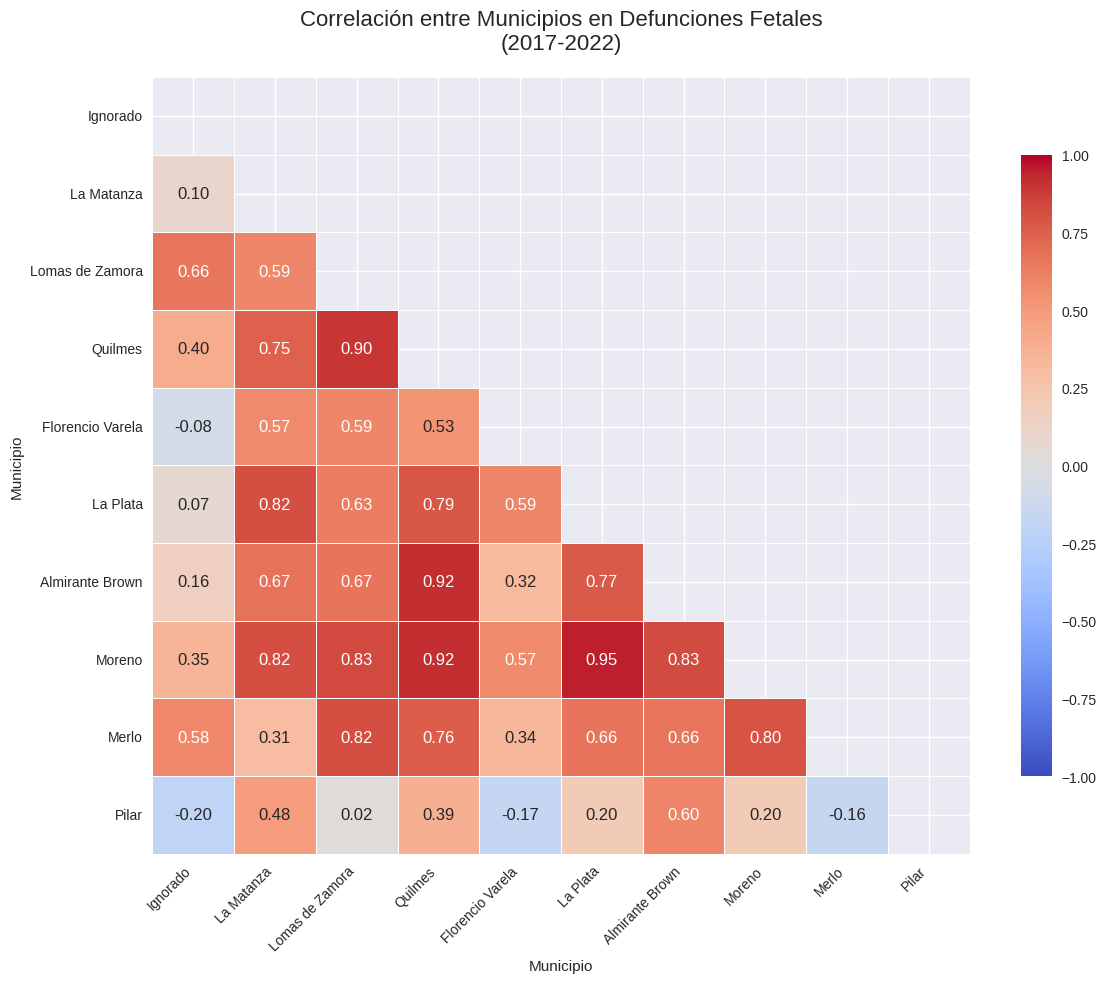

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

ANÁLISIS COMPLETADO - RESULTADOS EXPORTADOS A: /content/drive/MyDrive/MD-TP General/analisis_defunciones_fetales.xlsx


In [25]:
# ========================================================================
# ANÁLISIS COMPLETO DE DEFUNCIONES FETALES POR MUNICIPIO (2017-2022) - VERSIÓN COMPLETA
# ========================================================================

#import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns
#from google.colab import drive  # Solo para Google Colab

# Configuración de estilo para gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

# 1. ANÁLISIS DE TOP 10 MUNICIPIOS CON MAYOR MORTALIDAD FETAL
# -----------------------------------------------------------

# Calcular totales por municipio
df_municipios = df.groupby(['Municipio', 'ID Municipio'])['Cantidad Defunciones'].sum().reset_index()
df_municipios = df_municipios.sort_values('Cantidad Defunciones', ascending=False)

# Obtener top 10 municipios
top_10 = df_municipios.head(10).copy()
total_provincia = df['Cantidad Defunciones'].sum()

# Calcular porcentajes
top_10['Porcentaje'] = round((top_10['Cantidad Defunciones'] / total_provincia) * 100, 2)
top_10['Porcentaje Acumulado'] = top_10['Porcentaje'].cumsum()

# Calcular datos para "Otros municipios"
otros_municipios = df_municipios[~df_municipios['Municipio'].isin(top_10['Municipio'])]
total_otros = otros_municipios['Cantidad Defunciones'].sum()
porcentaje_otros = round((total_otros / total_provincia) * 100, 2)
min_otros = otros_municipios['Cantidad Defunciones'].min()
max_otros = otros_municipios['Cantidad Defunciones'].max()
cant_otros = len(otros_municipios)

# Mostrar tabla resumen mejorada
print("="*90)
print("TOP 10 MUNICIPIOS CON MAYOR CANTIDAD DE DEFUNCIONES FETALES (2017-2022)")
print("="*90)
print(f"Total de defunciones en Provincia Buenos Aires: {total_provincia:,}\n")
print(top_10[['Municipio', 'ID Municipio', 'Cantidad Defunciones', 'Porcentaje', 'Porcentaje Acumulado']].to_string(index=False))
print(f"\nOtros {cant_otros} municipios: {total_otros:,} defunciones ({porcentaje_otros}%)")
print(f"Rango en otros municipios: desde {min_otros} hasta {max_otros} defunciones")

# 2. ANÁLISIS DETALLADO POR MUNICIPIO (EVOLUCIÓN ANUAL)
# -----------------------------------------------------

# Obtener datos anuales para los top 10 municipios
top_10_names = top_10['Municipio'].tolist()
df_top_10 = df[df['Municipio'].isin(top_10_names)]

# Pivotear datos para mejor visualización
pivot_anual = df_top_10.pivot_table(
    index='Año',
    columns='Municipio',
    values='Cantidad Defunciones',
    aggfunc='sum'
).fillna(0)

# Reordenar columnas según ranking
pivot_anual = pivot_anual[top_10_names]

print("\n" + "="*90)
print("EVOLUCIÓN ANUAL DE DEFUNCIONES EN TOP 10 MUNICIPIOS")
print("="*90)
print(pivot_anual.to_string())

# 3. ANÁLISIS COMPARATIVO: LA MATANZA VS OTROS MUNICIPIOS
# -------------------------------------------------------

# Datos específicos para La Matanza
la_matanza = df[df['Municipio'] == 'La Matanza']
total_matanza = la_matanza['Cantidad Defunciones'].sum()
porc_matanza = round((total_matanza / total_provincia) * 100, 2)

# Comparación con otros grandes municipios
comparacion = top_10[top_10['Municipio'] != 'La Matanza'].head(3)
otros_municipios_comparacion = comparacion[['Municipio', 'Cantidad Defunciones', 'Porcentaje']]

print("\n" + "="*90)
print("COMPARACIÓN: LA MATANZA VS OTROS MUNICIPIOS PRINCIPALES")
print("="*90)
print(f"La Matanza: {total_matanza:,} defunciones ({porc_matanza}% del total)\n")
print("Otros municipios relevantes:")
print(otros_municipios_comparacion.to_string(index=False))

# 4. VISUALIZACIONES PROFESIONALES COMPLETAS
# ------------------------------------------

# Gráfico 1: Gráfico circular mejorado con categoría "Otros municipios"
plt.figure(figsize=(14, 10))

# Preparar datos para el pie chart
labels = top_10['Municipio'].tolist() + [f"Otros {cant_otros} municipios"]
sizes = top_10['Cantidad Defunciones'].tolist() + [total_otros]
colors = plt.cm.tab20c.colors[:len(labels)]

# Crear el gráfico con porcentajes reales
patches, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,
    labeldistance=1.05,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
    textprops={'fontsize': 10}
)

# Ajustar posición de los porcentajes
plt.setp(autotexts, size=10, weight="bold", color="white")

# Añadir título y leyenda descriptiva
plt.title('Distribución de Defunciones Fetales por Municipio\n(2017-2022)', fontsize=16, pad=20)
plt.legend(
    title=f"Detalle Otros Municipios:\n{cant_otros} municipios ({porcentaje_otros}%)\nRango: {min_otros}-{max_otros} defunciones",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=10
)

# Añadir círculo central para donut chart
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.tight_layout()
plt.show()

# Gráfico 2: Comparación La Matanza vs otros municipios principales
plt.figure(figsize=(12, 7))

# Preparar datos
municipios_comparar = ['La Matanza'] + otros_municipios_comparacion['Municipio'].tolist()
valores = [total_matanza] + otros_municipios_comparacion['Cantidad Defunciones'].tolist()

# Crear gráfico de barras
bars = plt.bar(municipios_comparar, valores, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

# Añadir valores encima de las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:,}\n({round(height/total_provincia*100,1)}%)',
             ha='center', va='bottom', fontsize=10)

plt.title('Comparación: La Matanza vs Otros Municipios Principales\n(2017-2022)', fontsize=16)
plt.ylabel('Cantidad de Defunciones', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Gráfico 3: Heatmap de correlación entre municipios
plt.figure(figsize=(12, 10))
corr_matrix = pivot_anual.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Ocultar duplicados

sns.heatmap(corr_matrix,
            mask=mask,
            annot=True,
            cmap='coolwarm',
            vmin=-1,
            vmax=1,
            center=0,
            fmt='.2f',
            linewidths=0.5,
            cbar_kws={'shrink': 0.8})

plt.title('Correlación entre Municipios en Defunciones Fetales\n(2017-2022)', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 5. EXPORTACIÓN A GOOGLE DRIVE
# -----------------------------

# Montar Google Drive (solo en Colab)
drive.mount('/content/drive')

# Definir ruta de guardado
file_path = '/content/drive/MyDrive/MD-TP General/analisis_defunciones_fetales.xlsx'

# Guardar resultados en Excel
with pd.ExcelWriter(file_path) as writer:
    top_10.to_excel(writer, sheet_name='Top 10 Municipios', index=False)
    pivot_anual.to_excel(writer, sheet_name='Evolución Anual')
    corr_matrix.to_excel(writer, sheet_name='Correlaciones')
    otros_municipios_comparacion.to_excel(writer, sheet_name='Comparación La Matanza', index=False)

    # Añadir hoja con resumen de otros municipios
    otros_resumen = pd.DataFrame({
        'Categoría': [f'Otros {cant_otros} municipios'],
        'Total Defunciones': [total_otros],
        'Porcentaje': [porcentaje_otros],
        'Mínimo': [min_otros],
        'Máximo': [max_otros]
    })
    otros_resumen.to_excel(writer, sheet_name='Resumen Otros', index=False)

print("\n" + "="*90)
print(f"ANÁLISIS COMPLETADO - RESULTADOS EXPORTADOS A: {file_path}")
print("="*90)

# Gráficos Exploratorios

1. Gráfico - Evolución Total de Defunciones por Año:

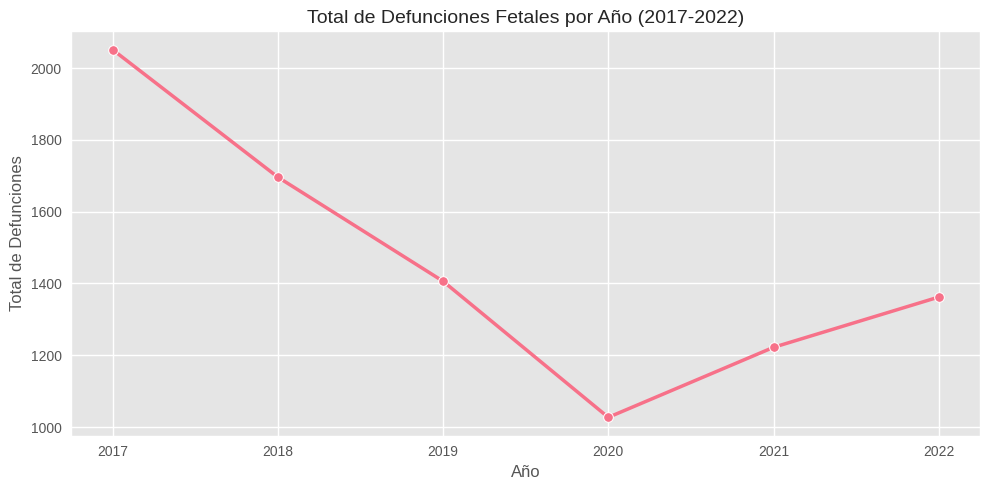

In [ ]:
# Configuración inicial
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 5)
sns.set_palette("husl")

# Gráfico 1: Evolución total
defunciones_por_anio = df.groupby('Año')['Cantidad Defunciones'].sum().reset_index()

# Convert 'Año' column to string before plotting
defunciones_por_anio['Año'] = defunciones_por_anio['Año'].astype(str)

plt.figure(figsize=(10, 5))
sns.lineplot(data=defunciones_por_anio, x='Año', y='Cantidad Defunciones',
             marker='o', linewidth=2.5)
plt.title('Total de Defunciones Fetales por Año (2017-2022)', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Total de Defunciones', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

Este gráfico de línea muestra la tendencia temporal del total de defunciones fetales registradas en la Provincia de Buenos Aires entre 2017 y 2022. A lo largo de estos seis años, las cifras presentan una considerable variación con un descenso sostenido entre 2017 a 2020.

Registrándose 2051 eventos de defunciones fetales en el año 2017 el valor más alto del periodo, 1696 eventos en 2018; luego se produce una caída más pronunciada entre 2019-2020, registrando 1406 en 2019 y 1027 en 2020 traduciéndose en una reducción del 14% respecto al año anterior; lo cual puede tener una posible relación con las medidas sanitarias durante la pandemia de COVID, donde probablemente hubo un menor registro por la saturación del sistema de salud, cambios en protocolos de notificación, un efecto de la restricciones implementadas que ocasionaron una menor movilidad y menos controles prenatales.

Se observa también una ligera recuperación en el año 2021 con 1222 casos y  1362 en el año 2022 alcanzando el valor más bajo del periodo analizado.


2. Gráfico - Evolución de los 5 municipios con más casos

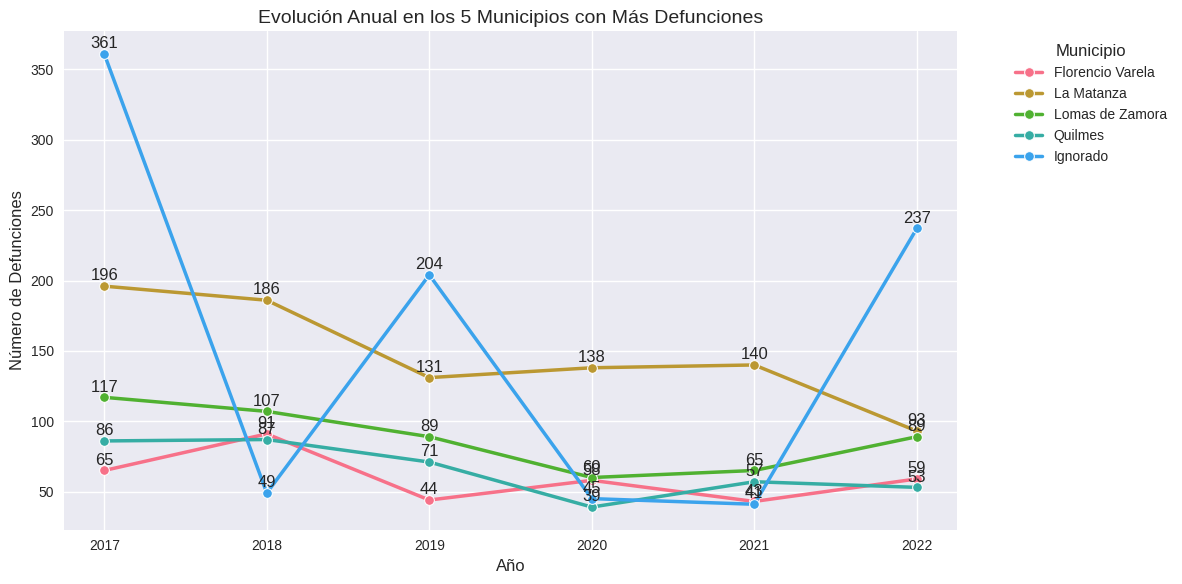

In [26]:
# Gráfico 3: Evolución top 5 municipios
top5 = df.groupby('Municipio')['Cantidad Defunciones'].sum().nlargest(5).index.tolist()
df_top5 = df[df['Municipio'].isin(top5)]

# Convert 'Año' index to integers representing the year
df_top5 = df_top5.reset_index()  # Reset index to make 'Año' a regular column
df_top5['Año'] = df_top5['Año'].dt.year  # Extract the year as integers

plt.figure(figsize=(12, 6))
lineplot = sns.lineplot(data=df_top5, x='Año', y='Cantidad Defunciones',
                        hue='Municipio', marker='o', linewidth=2.5)
plt.title('Evolución Anual en los 5 Municipios con Más Defunciones', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Número de Defunciones', fontsize=12)
plt.legend(title='Municipio', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Añadir etiquetas de valores
for municipio in top5:
    subset = df_top5[df_top5['Municipio'] == municipio]
    for año, valor in zip(subset['Año'], subset['Cantidad Defunciones']):
        plt.text(año, valor + 2, str(valor), ha='center', va='bottom')

plt.tight_layout()
plt.show()

El gráfico de líneas múltiples presenta un revelador análisis comparativo de la evolución temporal de las defunciones fetales en los cinco municipios bonaerenses con mayor carga de casos durante el período 2017-2022. La visualización permite identificar patrones epidemiológicos clave que merecen especial atención desde la perspectiva de salud pública.

Al examinar la trayectoria de cada municipio, se observa una tendencia general descendente que afecta a todas las jurisdicciones. La Matanza, que consistentemente presenta los valores más altos, experimentó una reducción notable de  196 casos en 2017 hasta 93 en 2022, una disminución cercana al 53%. Sin embargo, este descenso no fue lineal, mostró fluctuaciones interanuales particularmente marcadas entre 2019 y 2020, período que coincide con el inicio de la pandemia por COVID-19.

El caso de los registros clasificados como "Ignorado" merece especial consideración. Esta categoría, que probablemente agrupa casos de diversos orígenes geográficos, exhibe una variabilidad extrema, con picos en 2017 (361 casos) y 2022 (237 casos), contrastando con valores mínimos en 2018 (49 casos). Esta irregularidad sugiere importantes inconsistencias en los sistemas de registro que podrían estar enmascarando distribuciones territoriales reales.

Los municipios de Lomas de Zamora y Quilmes presentan trayectorias más estables, aunque con descensos igualmente significativos. Florencio Varela, por su parte, muestra un comportamiento particular, siendo el único donde el año de máxima incidencia no fue 2017, sino 2018, con 91 casos registrados.

El análisis cronológico revela que 2017 emerge como el año crítico para la mayoría de las jurisdicciones, mientras que 2020 marca un punto de inflexión donde las curvas de todos los municipios alcanzan sus mínimos relativos o absolutos. Este fenómeno podría relacionarse tanto con mejoras reales en los indicadores de salud materno-infantil como con posibles alteraciones en los sistemas de notificación durante la emergencia sanitaria.

La convergencia progresiva de las curvas en los últimos años sugiere una posible homogeneización en la distribución territorial de este problema de salud, aunque esta interpretación debe tomarse con cautela debido a la presencia de los casos no georreferenciados. La distancia entre el municipio de La Matanza y Florencio Varela se redujo significativamente, pasando de una diferencia de 296 casos en 2017 a solo 184 casos en 2022.

Esta visualización no solo identifica las áreas geográficas que requieren intervenciones prioritarias, sino que también plantea interrogantes fundamentales sobre la calidad de los sistemas de registro y la necesidad de implementar mecanismos más robustos de recolección de datos. Los patrones observados sirven como punto de partida para investigaciones más profundas que consideren variables socioeconómicas, acceso a servicios de salud y políticas públicas implementadas en el período.


3. Gráfico Heatmap - Correlación entre Años

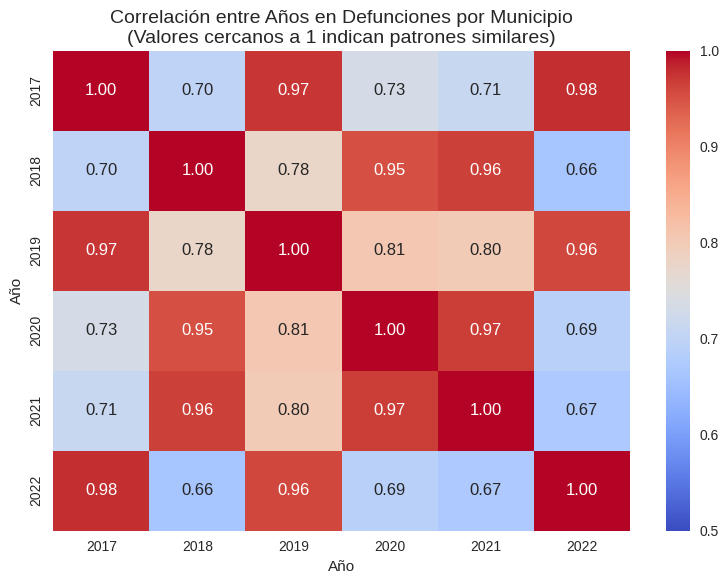

In [27]:
# Gráfico Correlación entre años
pivot_df = df.reset_index().pivot(index='Municipio', columns='Año', values='Cantidad Defunciones') # Reset index before pivoting
pivot_df = pivot_df.dropna()
corr_matrix = pivot_df.corr()

plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=0.5, vmax=1,
                      annot_kws={'size': 12}, fmt='.2f')
plt.title('Correlación entre Años en Defunciones por Municipio\n(Valores cercanos a 1 indican patrones similares)', fontsize=14)
plt.tight_layout()
plt.show()

El Gráfico de calor (Heatmap) mide la correlación, es decir evalúa qué tan similares son los patrones de defunciones fetales por municipio durante el periodo de años 2017 - 2022, basándose en el comportamiento de los municipios. Cada celda representa el coeficiente de correlación (rango: 0 a 1), donde los valores cercanos a 1 (tonos rojos) representan patrones casi idénticos entre años; mientras que los valores cercanos a 0.5 (tonos azules) representan una correlación moderada o inconsistente.

En este análisis, destaca la fuerte correlación entre los años 2020 - 2022, con un coeficiente r  >  0.95. Estos valores señalan que se mantuvo en este periodo una distribución similar de defunciones por municipio, con mayor número de defunciones en 2020 repitieron ese mismo patrón en 2022, evidenciando una consistencia notable en su comportamiento y sugiriendo factores estructurales persistentes por ejemplo, el acceso a la salud, condiciones socioeconómicas. Por otro lado, la relación entre 2020 y 2021 muestra un coeficiente de 0.70, lo cual indica una correlación moderada pero no tan sólida como la anterior. Este resultado sugiere que, aunque existe cierta continuidad, hubo factores en 2021 que alteraron parcialmente la tendencia observada el año anterior.

Se observa una baja correlación 2017-2019 (r ≈ 0.7), particularmente los años previos a la pandemia, que muestran patrones menos consistentes, posiblemente por cambios en protocolos de registro o variabilidad en políticas locales de salud materno-infantil. En 2019 se evidencia un año de transición que correla mejor con 2020-2022 (r > 0.8) que con 2017-2018, marcando un punto de inflexión hacia patrones más estables.

Podemos inferir que la consistencia post-2020 refuerza una hipótesis de que la pandemia homogeneizó los determinantes de mortalidad fetal, mientras que las diferencias previas (2017-2019) podrían deberse a intervenciones no estandarizadas o mejoras graduales en los sistemas de salud.


4. Gráfico Heatmap - Correlación entre Municipio - Año

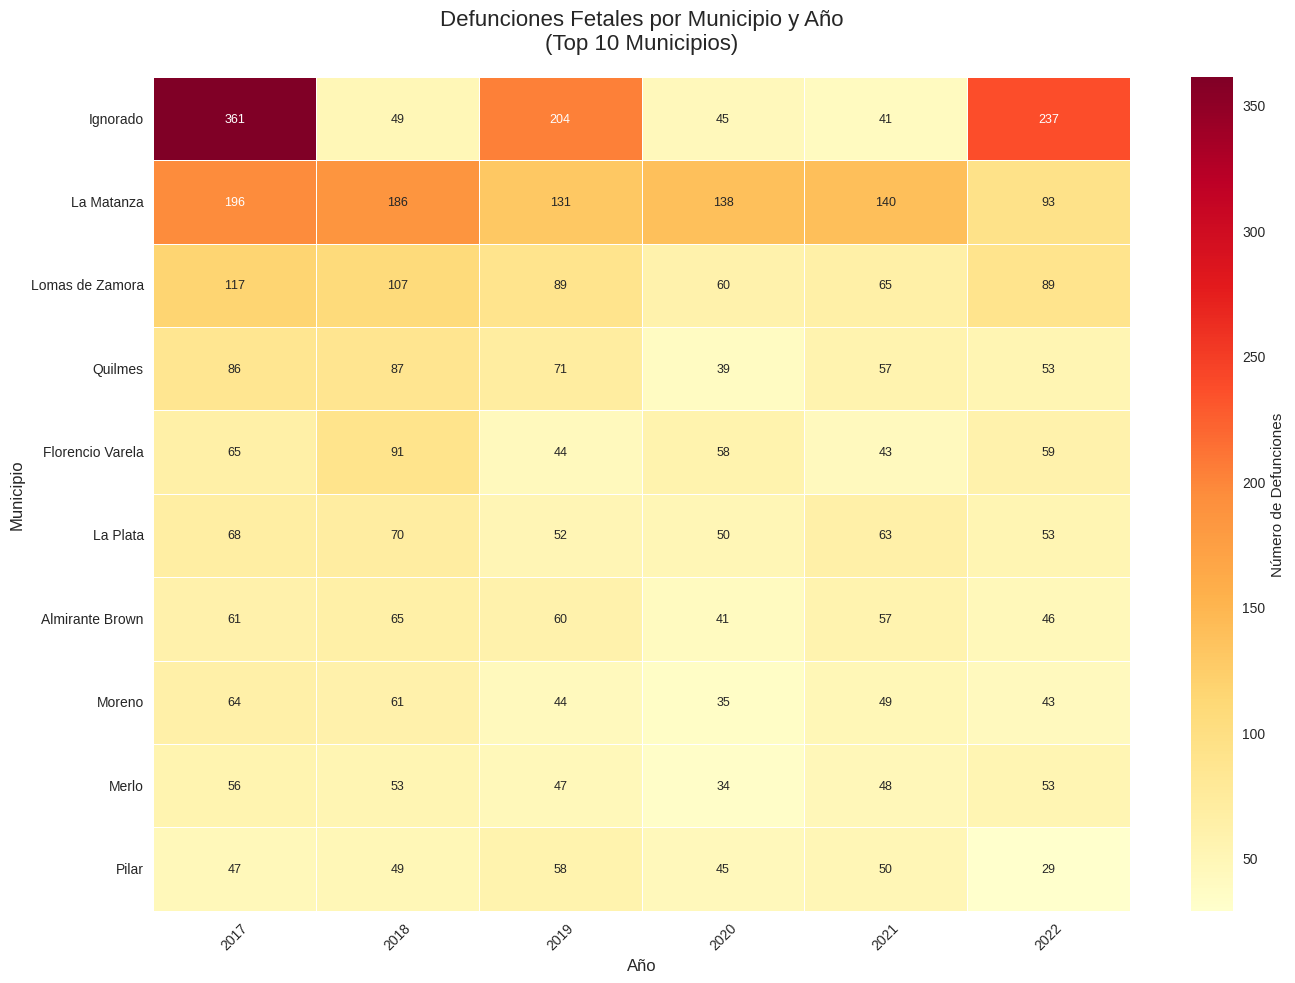

In [28]:
# 1. Preparación de datos (versión segura)
try:
    # Crear tabla pivote
    heatmap_data = df.reset_index().pivot_table(
        index='Municipio',
        columns='Año',
        values='Cantidad Defunciones',
        aggfunc='sum',
        fill_value=0
    )

    # Ordenar por municipios con más defunciones totales
    heatmap_data = heatmap_data.loc[heatmap_data.sum(axis=1).sort_values(ascending=False).index]

    # Limitar a los 10 municipios principales para mejor visualización
    heatmap_data = heatmap_data.head(10)

    # 2. Configuración del heatmap
    plt.figure(figsize=(14, 10))

    sns.heatmap(
        heatmap_data,
        annot=True,
        fmt='d',  # Mostrar números enteros
        cmap='YlOrRd',  # Escala amarillo-naranja-rojo
        linewidths=0.5,
        cbar_kws={'label': 'Número de Defunciones'},
        annot_kws={'size': 9}
    )

    # 3. Personalización
    plt.title('Defunciones Fetales por Municipio y Año\n(Top 10 Municipios)',
              fontsize=16, pad=20)
    plt.xlabel('Año', fontsize=12)
    plt.ylabel('Municipio', fontsize=12)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Error al generar el heatmap: {str(e)}")
    print("\nPosibles soluciones:")
    print("- Verifica que 'Municipio' y 'Año' existen como columnas")
    print("- Asegúrate que 'Cantidad Defunciones' contiene solo números")
    print("- Comprueba que no hay valores nulos con: df.isnull().sum()")

El mapa de calor muestra la distribución de defunciones fetales en los 10 municipios con mayor incidencia durante el período 2017-2022. El dato más destacado es la categoría "Ignorado", que registra números alarmantes (361 casos en el primer año analizado); el no tener especificado qué municipios integran esta categoría indica serios problemas en la recolección o clasificación de la información; más cuando sus valores en defunciones fetales muestran una variabilidad interanual.

Entre los municipios identificables, la matanza lidera con 196 defunciones iniciales y es el municipio que presenta constantemente valores más alto respecto a los demás municipios; seguido por Lomas de Zamora y Quilmes.
La mayoría de las localidades muestran una disminución progresiva de casos siendo 2017 el año con mayor incidencia y 2022 el de menor registro (ejemplo: La Matanza redujo de 196 a 93 casos). No obstante, hay excepciones como ser Florencio Varela tuvo un pico inesperado (de 65 a 91) y Pilar presentó un aumento temporal (de 47 a 58).

La escala cromática (amarillo a rojo) permite identificar rápidamente los puntos críticos, destacando la persistente concentración geográfica de estos eventos en el conurbano bonaerense.


# Reporte

In [29]:
!pip install ydata-profiling
from pandas_profiling import ProfileReport
report = ProfileReport(df)
report.to_notebook_iframe()

<ipython-input-29-4209980933>:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 3/3 [00:00<00:00, 142.22it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Guardar el Reporte:

In [30]:
report.to_file("/content/drive/MyDrive/MD-TP General/Reporte_defunciones_fetales.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Mapeo

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Suponiendo que tu DataFrame df ya está cargado
# Si no, puedes cargarlo así:
# df = pd.read_csv('tu_archivo.csv')  # Ajusta según tu fuente de datos

# Paso 1: Obtener los datos geoespaciales de Buenos Aires
# Puedes usar estos archivos geoespaciales comunes:
# Opción 1: Desde una URL (ejemplo)
# url = "https://raw.githubusercontent.com/geoinquietosarg/GeoJSON-Argentina/master/geojson/provincias/buenos_aires_municipios.geojson"
# gdf = gpd.read_file(url)

# Opción 2: Si tienes un archivo local en Colab
# Sube el archivo GeoJSON o Shapefile de los municipios de BA a Colab
# from google.colab import files
# uploaded = files.upload()
# gdf = gpd.read_file('tu_archivo_geojson.geojson')

# Como ejemplo, usaré datos disponibles públicamente (puede necesitar ajustes)
# Intento con datos de Argentina (puede que necesites instalar geopandas: !pip install geopandas)
try:
    # Intentamos cargar datos de municipios de BA
    gdf = gpd.read_file("https://servicios.usig.buenosaires.gob.ar/geoserver/wfs?srsName=EPSG%3A4326&typename=geonode%3Adivision_politica_municipios&outputFormat=json&version=1.0.0&service=WFS&request=GetFeature")
except:
    # Si falla, usamos datos alternativos (puede requerir ajuste de nombres)
    print("No se pudo cargar datos geoespaciales directamente, usando alternativa...")
    import requests
    url = "https://raw.githubusercontent.com/geoinquietosarg/GeoJSON-Argentina/master/geojson/provincias/buenos_aires_municipios.geojson"
    gdf = gpd.read_file(url)

# Verificamos los datos geoespaciales
print("Columnas en datos geoespaciales:", gdf.columns)
print("Municipios en datos geoespaciales:", gdf['nam'].head() if 'nam' in gdf.columns else gdf['nombre'].head())

# Preparamos los datos de defunciones
# Asegurémonos de que estamos trabajando con un DataFrame de pandas
df_defunciones = df.reset_index()  # Sacamos 'Año' del índice si es necesario
df_defunciones = df_defunciones[df_defunciones['Año'] == 2017]  # Ejemplo para un año

# Paso 2: Unir los datos geoespaciales con los datos de defunciones
# Necesitamos hacer coincidir los nombres de los municipios
# Esto puede requerir ajustes según cómo estén escritos los nombres

# Primero normalizamos los nombres (eliminamos acentos, mayúsculas, etc.)
import unicodedata

def normalize_string(text):
    if not isinstance(text, str):
        return ""
    text = unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode('ASCII')
    return text.lower().strip()

# Aplicamos a ambos DataFrames
gdf['nombre_normalizado'] = gdf['nam'].apply(normalize_string) if 'nam' in gdf.columns else gdf['nombre'].apply(normalize_string)
df_defunciones['Municipio_normalizado'] = df_defunciones['Municipio'].apply(normalize_string)

# Hacemos el merge
merged = gdf.merge(df_defunciones,
                   left_on='nombre_normalizado',
                   right_on='Municipio_normalizado',
                   how='left')

# Verificamos la unión
print("\nMunicipios coincidentes:", merged[~merged['ID Municipio'].isna()].shape[0])
print("Municipios sin datos:", merged[merged['ID Municipio'].isna()].shape[0])

# Paso 3: Crear el mapa
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

# Configuramos el color según la cantidad de defunciones
norm = Normalize(vmin=merged['Cantidad Defunciones'].min(),
                 vmax=merged['Cantidad Defunciones'].max())

# Mapeamos los municipios con datos
merged.plot(column='Cantidad Defunciones',
            cmap='YlOrRd',
            linewidth=0.8,
            ax=ax,
            edgecolor='0.8',
            legend=True,
            norm=norm,
            missing_kwds={'color': 'lightgrey', 'label': 'Sin datos'})

# Añadimos etiquetas a los municipios (opcional)
for idx, row in merged.iterrows():
    if not pd.isna(row['Cantidad Defunciones']):
        plt.annotate(text=row['Municipio'],
                     xy=row['geometry'].centroid.coords[0],
                     horizontalalignment='center',
                     fontsize=8)

# Añadimos título y leyenda
ax.set_title('Defunciones por municipio - Provincia de Buenos Aires (2017)', fontsize=16)
ax.set_axis_off()

# Añadimos barra de color
sm = ScalarMappable(norm=norm, cmap='YlOrRd')
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, fraction=0.03, pad=0.04)
cbar.set_label('Cantidad de Defunciones', rotation=270, labelpad=20)

plt.tight_layout()
plt.show()

No se pudo cargar datos geoespaciales directamente, usando alternativa...


HTTPError: HTTP Error 404: Not Found

# Machine Learning

Importancia de características para predecir defunciones fetales


🔮 Entrenando modelo Random Forest...
Random Forest - MAE: 4.47
Random Forest - R²: 0.87

🔮 Entrenando modelo XGBoost...
XGBoost - MAE: 4.35
XGBoost - R²: 0.82

📊 Ejemplo de predicción para La Matanza en 2023:
Predicción para La Matanza en 2023: 94.5 defunciones

📈 Importancia de características en XGBoost:


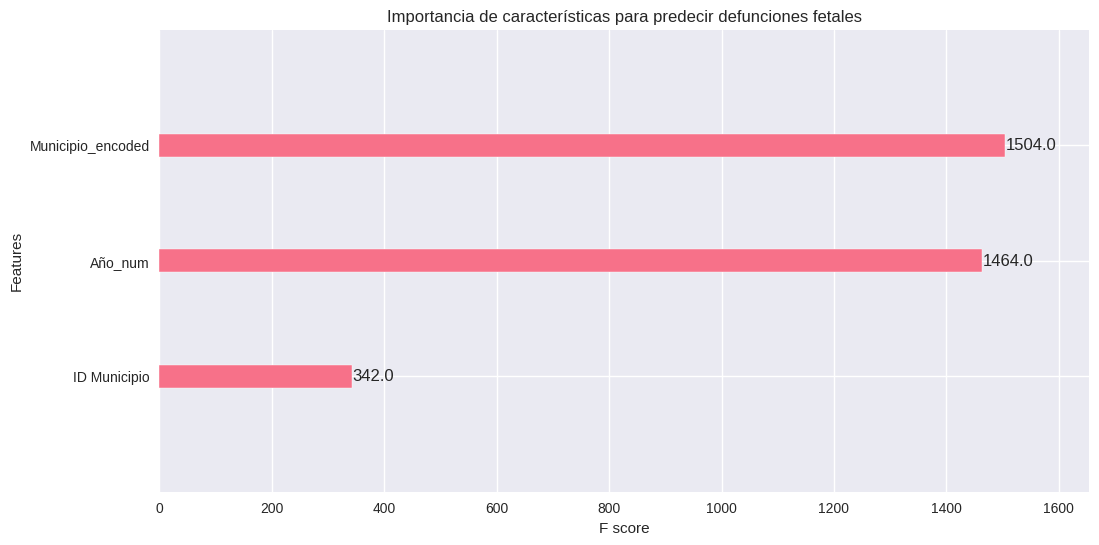

In [31]:
# =============================================
# MODELO DE MACHINE LEARNING PARA PREDICCIÓN
# =============================================

# Importar librerías adicionales necesarias
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb


# Preparación de datos sin modificar el DataFrame original
def preparar_datos_ml(df_original):
    """
    Prepara los datos para ML sin modificar el DataFrame original.
    Devuelve un nuevo DataFrame procesado.
    """
    # Crear copia para no modificar los datos originales
    df_ml = df_original.reset_index().copy()

    # Convertir año a numérico
    df_ml['Año_num'] = df_ml['Año'].dt.year

    # Codificar municipios (evitamos One-Hot para muchos municipios)
    le = LabelEncoder()
    df_ml['Municipio_encoded'] = le.fit_transform(df_ml['Municipio'])

    # Seleccionar características y objetivo
    X = df_ml[['Año_num', 'Municipio_encoded', 'ID Municipio']]
    y = df_ml['Cantidad Defunciones']

    return X, y, le

# Preparar datos
X, y, label_encoder = preparar_datos_ml(df)

# Dividir en entrenamiento y prueba (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo 1: Random Forest
print("\n🔮 Entrenando modelo Random Forest...")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluación
rf_pred = rf_model.predict(X_test)
print(f"Random Forest - MAE: {mean_absolute_error(y_test, rf_pred):.2f}")
print(f"Random Forest - R²: {r2_score(y_test, rf_pred):.2f}")

# Modelo 2: XGBoost (mejor para datos temporales)
print("\n🔮 Entrenando modelo XGBoost...")
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Evaluación
xgb_pred = xgb_model.predict(X_test)
print(f"XGBoost - MAE: {mean_absolute_error(y_test, xgb_pred):.2f}")
print(f"XGBoost - R²: {r2_score(y_test, xgb_pred):.2f}")

# Función para hacer predicciones
def predecir_defunciones(modelo, año, municipio, label_encoder, id_municipio=0):
    """
    Predice defunciones para un municipio y año específicos.

    Args:
        modelo: Modelo entrenado (RF o XGB)
        año: Año a predecir (ej. 2023)
        municipio: Nombre del municipio (str)
        label_encoder: LabelEncoder usado en entrenamiento
        id_municipio: ID del municipio (opcional)
    """
    try:
        # Codificar municipio
        municipio_encoded = label_encoder.transform([municipio])[0]

        # Crear array de características
        X_pred = [[año, municipio_encoded, id_municipio]]

        # Predecir
        prediccion = modelo.predict(X_pred)[0]

        print(f"Predicción para {municipio} en {año}: {prediccion:.1f} defunciones")
        return prediccion
    except Exception as e:
        print(f"Error en predicción: {str(e)}")
        return None

# Ejemplo de predicción
print("\n📊 Ejemplo de predicción para La Matanza en 2023:")
predecir_defunciones(xgb_model, 2023, "La Matanza", label_encoder)

# Visualización de importancia de características
print("\n📈 Importancia de características en XGBoost:")
xgb.plot_importance(xgb_model)
plt.title('Importancia de características para predecir defunciones fetales')
plt.show()

Predicción por municipio de las posibles cantidad de defunciones fetales en los años 2023 y 2024. El modelo simplificado abarca los tres municipios georreferenciados con mayor cantidad de defunciones fetales en 2017-2022.

Verificando estructura de datos...
Columnas disponibles: ['ID Municipio', 'Municipio', 'Cantidad Defunciones']
Años disponibles: Index([2017, 2018, 2019, 2020, 2021, 2022], dtype='int64', name='Año')
Prophet está instalado correctamente

PROCESANDO: La Matanza


INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq7vp48ot/wqu3fy7f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq7vp48ot/stz99_fn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74960', 'data', 'file=/tmp/tmpq7vp48ot/wqu3fy7f.json', 'init=/tmp/tmpq7vp48ot/stz99_fn.json', 'output', 'file=/tmp/tmpq7vp48ot/prophet_modelii7h2sll/prophet_model-20250611154416.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:44:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:44:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.


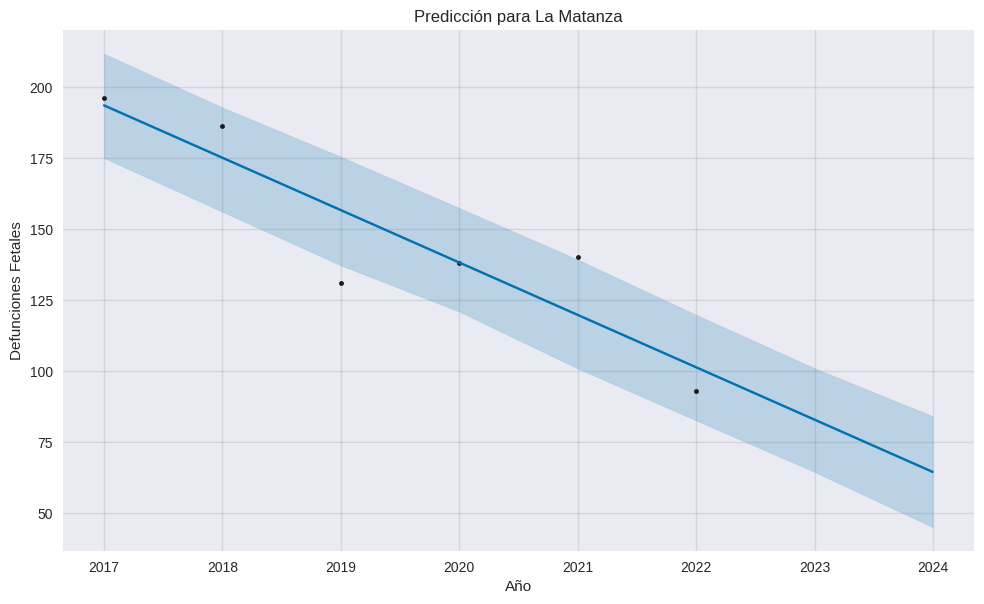

INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq7vp48ot/e1v7ytw2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq7vp48ot/yngn3k8r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11909', 'data', 'file=/tmp/tmpq7vp48ot/e1v7ytw2.json', 'init=/tmp/tmpq7vp48ot/yngn3k8r.json', 'output', 'file=/tmp/tmpq7vp48ot/prophet_model_ww45od6/prophet_model-20250611154416.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:44:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:44:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Predicciones para La Matanza:
          ds       yhat  yhat_lower  yhat_upper
6 2022-12-31  82.832612   64.384434  100.942630
7 2023-12-31  64.400915   44.972039   84.037976

PROCESANDO: Quilmes


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


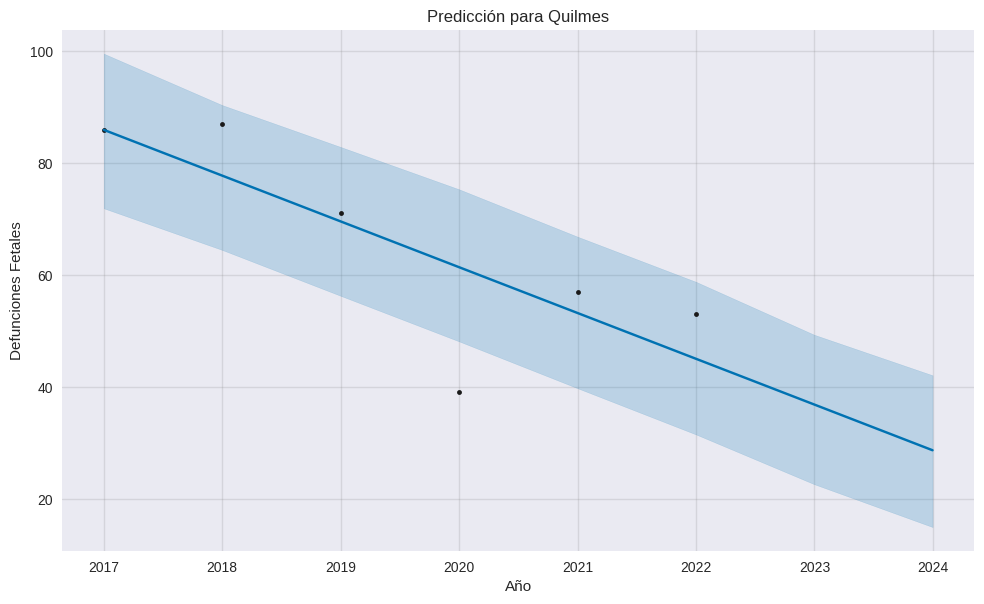

INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq7vp48ot/yuhir03e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq7vp48ot/wwm56ff7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77828', 'data', 'file=/tmp/tmpq7vp48ot/yuhir03e.json', 'init=/tmp/tmpq7vp48ot/wwm56ff7.json', 'output', 'file=/tmp/tmpq7vp48ot/prophet_modelpb6ks7yr/prophet_model-20250611154417.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:44:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:44:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Predicciones para Quilmes:
          ds       yhat  yhat_lower  yhat_upper
6 2022-12-31  36.852712   22.607607   49.318793
7 2023-12-31  28.671121   14.943665   42.073267

PROCESANDO: Lomas de Zamora


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


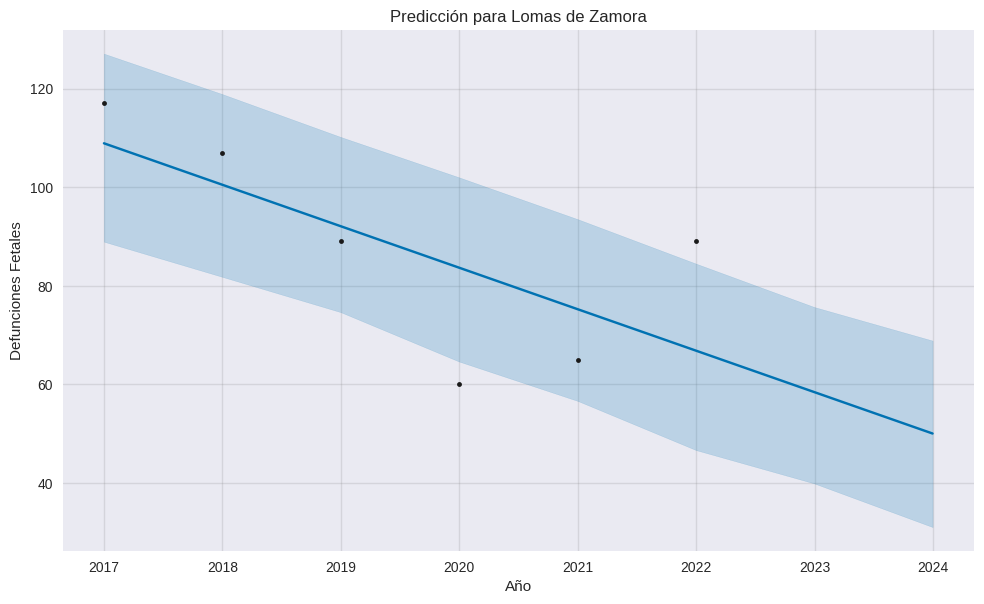


Predicciones para Lomas de Zamora:
          ds       yhat  yhat_lower  yhat_upper
6 2022-12-31  58.415857   39.880016   75.675104
7 2023-12-31  50.002013   31.021554   68.858107


In [32]:
# =============================================
# MODELO SIMPLIFICADO DE PREDICCIÓN POR MUNICIPIO
# =============================================

# 1. Primero verificamos que los datos estén correctamente cargados
print("Verificando estructura de datos...")
print(f"Columnas disponibles: {df.columns.tolist()}")
print(f"Años disponibles: {df.index.year.unique()}")

# 2. Función simplificada para preparar datos
def preparar_datos_municipio(municipio):
    """Filtra los datos para un municipio específico"""
    try:
        datos_municipio = df[df['Municipio'] == municipio].copy()
        if datos_municipio.empty:
            print(f"No hay datos para el municipio: {municipio}")
            return None

        # Asegurarnos de que tenemos todos los años
        años_completos = pd.DataFrame(index=pd.period_range('2017','2022', freq='Y'))
        datos_completos = años_completos.join(datos_municipio['Cantidad Defunciones'])

        # Rellenar valores faltantes con el promedio
        datos_completos = datos_completos.fillna(datos_completos.mean())

        return datos_completos['Cantidad Defunciones']

    except Exception as e:
        print(f"Error preparando datos: {str(e)}")
        return None

# 3. Modelado con Prophet (más robusto para series cortas)
try:
    from prophet import Prophet
    print("Prophet está instalado correctamente")
except:
    print("Instalando Prophet...")
    !pip install prophet
    from prophet import Prophet

def predecir_con_prophet(serie, municipio, años_prediccion=1):
    """Predicción usando Prophet de Facebook"""
    try:
        if serie is None:
            return None

        # Preparar datos para Prophet
        df_prophet = pd.DataFrame({
            'ds': serie.index.to_timestamp(),
            'y': serie.values
        })

        # Modelo simple
        modelo = Prophet(
            yearly_seasonality=False,  # Desactivar estacionalidad anual (pocos datos)
            daily_seasonality=False,
            weekly_seasonality=False
        )
        modelo.fit(df_prophet)

        # Crear dataframe futuro
        futuro = modelo.make_future_dataframe(periods=años_prediccion, freq='Y')
        pronostico = modelo.predict(futuro)

        # Visualización
        fig = modelo.plot(pronostico)
        plt.title(f'Predicción para {municipio}')
        plt.xlabel('Año')
        plt.ylabel('Defunciones Fetales')
        plt.show()

        # Mostrar últimos valores
        print(f"\nPredicciones para {municipio}:")
        print(pronostico[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(años_prediccion))

        return pronostico

    except Exception as e:
        print(f"Error en Prophet: {str(e)}")
        return None

# 4. Ejecución para municipios específicos
municipios_ejemplo = ['La Matanza', 'Quilmes', 'Lomas de Zamora']  # Ejemplos

for municipio in municipios_ejemplo:
    print(f"\n{'='*50}")
    print(f"PROCESANDO: {municipio}")
    print("="*50)

    serie = preparar_datos_municipio(municipio)
    if serie is not None:
        prediccion = predecir_con_prophet(serie, municipio, años_prediccion=2)